In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Sequential, load_model, Model
from keras.applications.mobilenet import MobileNet

from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import train_test_split

from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow

from keras.layers import Flatten


Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
!pip install pillow
print("The number of images with facemask labelled 'yes':",len(os.listdir('/content/drive/My Drive/Colab Notebooks/Covid-Research/Face-Detection-master/dataset/with mask')))
print("The number of images with facemask labelled 'no':",len(os.listdir('/content/drive/My Drive/Colab Notebooks/Covid-Research/Face-Detection-master/dataset/without mask')))

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/
The number of images with facemask labelled 'yes': 690
The number of images with facemask labelled 'no': 686


In [17]:
#os.listdir('/content/drive/My Drive/Colab Notebooks/Covid-Research/Face-Detection-master/dataset/with mask')
x = []
y = []


for i in os.listdir('/content/drive/My Drive/Colab Notebooks/Covid-Research/Face-Detection-master/dataset/with_mask'):
  img=load_img('/content/drive/My Drive/Colab Notebooks/Covid-Research/Face-Detection-master/dataset/with_mask/'+ str(i), target_size=(224,224))
  #img = Image.open('lena.png').convert('LA') 
  img=img_to_array(img)
  #img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
  #print(img)
  img=preprocess_input(img)
  x.append(img)
  y.append([1, 0])
print('First Part finish')

for i in os.listdir('/content/drive/My Drive/Colab Notebooks/Covid-Research/Face-Detection-master/dataset/without_mask'):
  img=load_img('/content/drive/My Drive/Colab Notebooks/Covid-Research/Face-Detection-master/dataset/without_mask/'+ str(i), target_size=(224,224))
  img=img_to_array(img)
  #img = image.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
  img=preprocess_input(img)
  x.append(img)
  y.append([0, 1])

data=np.array(x)
labels=np.array(y)
print(data.shape)
#print(data)
print(labels)

First Part finish
(1376, 224, 224, 3)
[[1 0]
 [1 0]
 [1 0]
 ...
 [0 1]
 [0 1]
 [0 1]]


In [18]:
(x_train, x_test, y_train, y_test) = train_test_split(data, labels)

In [19]:
model=Sequential()
mobnet=MobileNet()

for layer in range(len(mobnet.layers)-1):
  model.add(mobnet.layers[layer])

for layer in model.layers[:-9]:
  layer.trainable = False

model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [21]:
mobnet=  MobileNet(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

out=mobnet.output

out=GlobalAveragePooling2D()(out)
out=Dense(1024, activation='relu')(out)
out=Dense(1024, activation='relu')(out)
out=Dense(512, activation='relu')(out)

preds= Dense(2, activation='softmax')(out)
model=Model(inputs=mobnet.input, outputs=preds)

for layer in model.layers[:-9]:
  layer.trainable = False


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print('Done')

Done


In [22]:
model.save('mask_det_model.h5')
mdl=load_model('mask_det_model.h5')

In [ ]:
print(y_train.shape)
hist=model.fit(x_train,y_train, epochs=10, batch_size=32, validation_split=0.1)


(1032, 2)
Train on 928 samples, validate on 104 samples
Epoch 1/10
928/928 [==============================] - 73s 78ms/step - loss: 0.2819 - accuracy: 0.9300 - val_loss: 0.3478 - val_accuracy: 0.9519
Epoch 2/10
928/928 [==============================] - 72s 78ms/step - loss: 0.0121 - accuracy: 0.9957 - val_loss: 0.6800 - val_accuracy: 0.9231
Epoch 3/10
928/928 [==============================] - 71s 76ms/step - loss: 0.0148 - accuracy: 0.9957 - val_loss: 0.0183 - val_accuracy: 0.9904
Epoch 4/10
928/928 [==============================] - 71s 77ms/step - loss: 0.0075 - accuracy: 0.9989 - val_loss: 0.0792 - val_accuracy: 0.9904
Epoch 5/10
928/928 [==============================] - 71s 77ms/step - loss: 0.0025 - accuracy: 0.9978 - val_loss: 3.1237e-05 - val_accuracy: 1.0000
Epoch 6/10
928/928 [==============================] - 71s 76ms/step - loss: 2.1757e-04 - accuracy: 1.0000 - val_loss: 2.6966e-05 - val_accuracy: 1.0000
Epoch 7/10
384/928 [===========>..................] - ETA: 36s - los

In [ ]:
model.evaluate(x_test,y_test)

344/344 [==============================] - 12s 36ms/step


[0.13765242308171896, 0.9883720874786377]

In [ ]:
classifier = cv2.CascadeClassifier('/content/drive/My Drive/Colab Notebooks/Covid-Research/Face-Detection-master/haarcascade_frontalface_default.xml')

In [ ]:
"""labels_dict={0:'without_mask',1:'with_mask'}
color_dict={0:(0,0,255),1:(0,255,0)}

size = 4
webcam = cv2.VideoCapture(0) #Use camera 0

while True:
    (rval, im) = webcam.read()
    im=cv2.flip(im,1,1) #Flip to act as a mirror

    # Resize the image to speed up detection
    mini = cv2.resize(im, (im.shape[1] // size, im.shape[0] // size))

    # detect MultiScale / faces 
    faces = classifier.detectMultiScale(mini)

    # Draw rectangles around each face
    for f in faces:
        (x, y, w, h) = [v * size for v in f] #Scale the shapesize backup
        #Save just the rectangle faces in SubRecFaces
        face_img = im[y:y+h, x:x+w]
        resized=cv2.resize(face_img,(150,150))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,150,150,3))
        reshaped = np.vstack([reshaped])
        result=model.predict(reshaped)
        #print(result)
        
        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(im,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(im,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(im, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
    # Show the image
    cv2.imshow('LIVE',   im)
    key = cv2.waitKey(10)
    # if Esc key is press then break out of the loop 
    if key == 27: #The Esc key
        break
# Stop video
webcam.release()

# Close all started windows
cv2.destroyAllWindows()"""

[[27 43 32 32]]
108
172
128
[[1.9366115e-12 1.0000000e+00]]


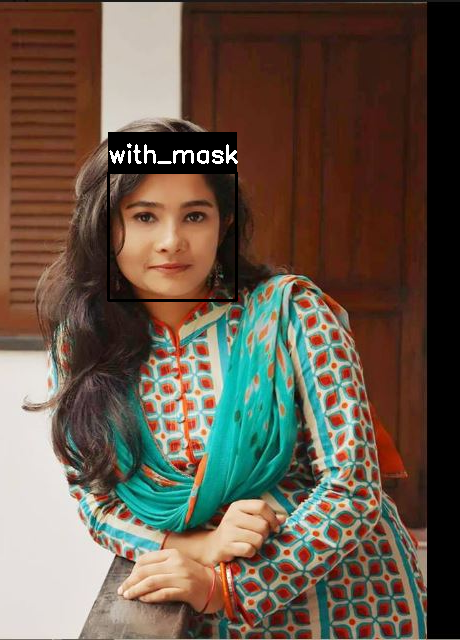

In [ ]:
#paths = os.path.abspath(os.path.dirname(__file__))
#img1 = os.path.join(paths,'img/standard.png')


labels_dict={0:'without_mask',1:'with_mask'}
color_dict={0:(0,255,0),1:(0,0,0)}

size=4
image = cv2.imread('/content/drive/My Drive/Colab Notebooks/Covid-Research/Face-Detection-master/Jayati.JPG')
#cv2_imshow(img)
im=cv2.flip(image,1,1) #Flip to act as a mirror

    # Resize the image to speed up detection
mini = cv2.resize(im, (im.shape[1] // size, im.shape[0] // size))

    # detect MultiScale / faces 
faces = classifier.detectMultiScale(mini)
#for v in faces: 
print(faces)
x =  faces[0][0] *size #Scale the shapesize backup
print(x)
y =  faces[0][1] *size
w =  faces[0][2] *size
h =  faces[0][3] *size
print(y)

print(w)

#Save just the rectangle faces in SubRecFaces
face_img = im[y:y+h, x:x+w]
resized=cv2.resize(face_img,(200,200))
normalized=resized/255.0
#print(normalized)
reshaped=np.reshape(normalized,(1,200,200,3))
reshaped = np.vstack([reshaped])
result=model.predict(reshaped)
print(result)

label=np.argmax(result,axis=1)[0]

cv2.rectangle(im,(x,y),(x+w,y+h),color_dict[label],2)
cv2.rectangle(im,(x,y-40),(x+w,y),color_dict[label],-1)
cv2.putText(im, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)

# Show the image
cv2_imshow(  im)
  
  

